In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
res_dict=joblib.load("data/202305201150.pkl")

In [3]:

# convert to table
table_columns=["CV_MAE","CV_RMSE"]
data_list=[]
for key,value in res_dict.items():
    data_list.append([key[0],key[1],key[2],key[3]]+[value[i] for i in table_columns])

res_table=pd.DataFrame(data_list,columns=["dataset","CV","Descriptor","Model"]+table_columns)
res_table=res_table.drop(columns=["dataset"])
#res_table.sort_values(by=["dataset","CV","descriptor","model"],inplace=True)

res_table["Descriptor"]=res_table["Descriptor"].replace("GPT-4 (polymer)","GPT-4(p)")

res_table=res_table.rename(columns={"CV_MAE":"MAE","CV_RMSE":"RMSE"})

In [4]:
res_table[res_table["CV"]=="Random CV"].drop("CV",axis=1).sort_values(by=["MAE"])

,Descriptor,Model,MAE,RMSE
24,GPT-4,Ridge,0.022912,0.031015
25,GPT-4,Lasso,0.023647,0.032027
1,All,Lasso,0.027239,0.033375
21,Boruta,GPR,0.027576,0.033902
18,Boruta,Ridge,0.027894,0.034459
5,All,GBR,0.028697,0.037371
0,All,Ridge,0.029138,0.037315
22,Boruta,RFR,0.029544,0.039064
4,All,RFR,0.029745,0.039427
23,Boruta,GBR,0.030361,0.038447


In [5]:
res_table[res_table["Model"]=="GPR"].sort_values(by=["CV","MAE"])[:10]

,CV,Descriptor,Model,MAE,RMSE
21,Random CV,Boruta,GPR,0.027576,0.033902
27,Random CV,GPT-4,GPR,0.030393,0.037225
15,Random CV,Random-20,GPR,0.039101,0.051381
9,Random CV,Random-10,GPR,0.040358,0.051155
3,Random CV,All,GPR,0.066437,0.131035


Text(0.5, 0, 'Descriptor set')

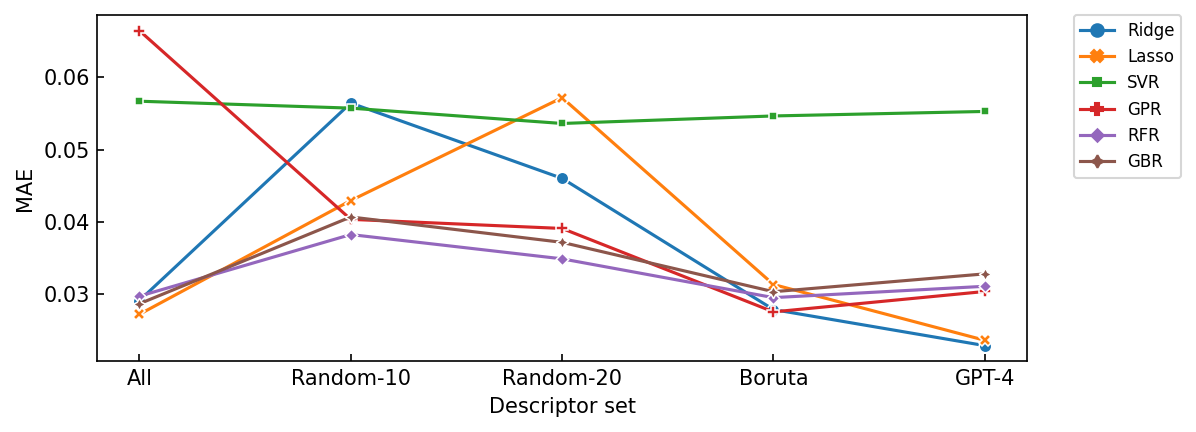

In [6]:
plt.figure(figsize=(8,3),dpi=150)
ax=plt.gca()
ax.tick_params(direction='in')

sns.lineplot(x="Descriptor",y="MAE",hue="Model",
             data=res_table[res_table["CV"]!="Cluster CV"],
             style="Model",markers=True,dashes=False,
             )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xlabel("Descriptor set")



In [7]:
model="Ridge"
gpr_data_dict={}
for k,v in res_dict.items():
    if k[3]==model:
        gpr_data_dict[k]=v["CV_plot"]

gpr_data_dict.keys()

dict_keys([('Dataset', 'Random CV', 'All', 'Ridge'), ('Dataset', 'Random CV', 'Random-10', 'Ridge'), ('Dataset', 'Random CV', 'Random-20', 'Ridge'), ('Dataset', 'Random CV', 'Boruta', 'Ridge'), ('Dataset', 'Random CV', 'GPT-4', 'Ridge')])

      Experimental n
id                  
9241           1.540
9242           1.555
9275           1.430
      Experimental n
id                  
9241           1.540
9242           1.555
9275           1.430
      Experimental n
id                  
9241           1.540
9242           1.555
9275           1.430
      Experimental n
id                  
9241           1.540
9242           1.555
9275           1.430
      Experimental n
id                  
9241           1.540
9242           1.555
9275           1.430


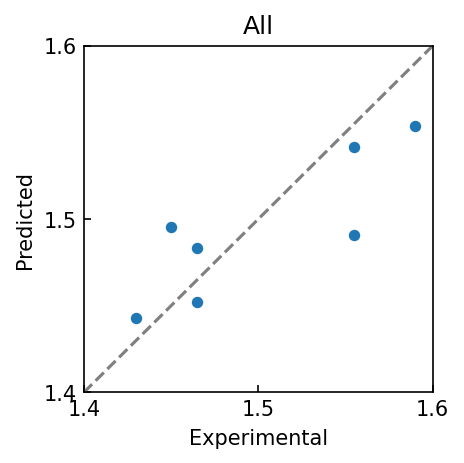

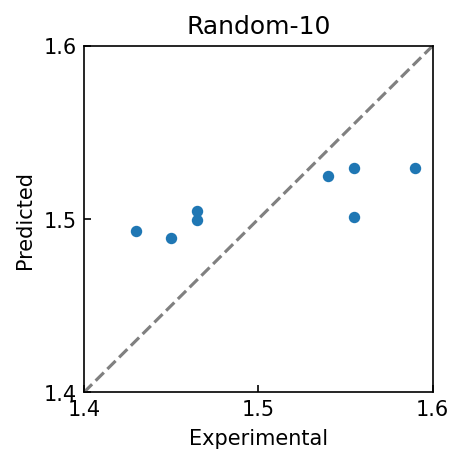

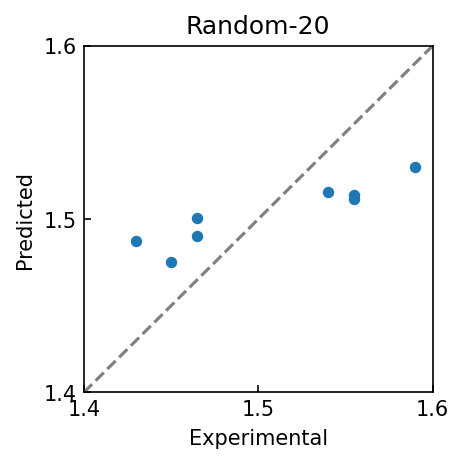

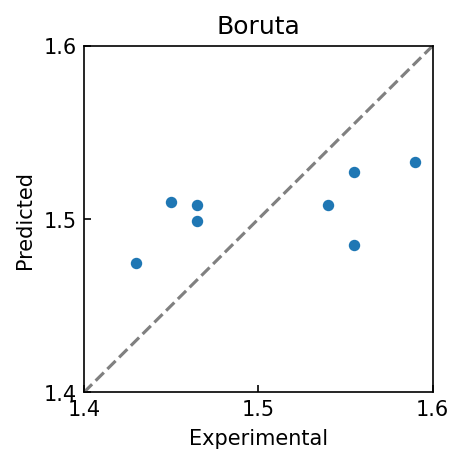

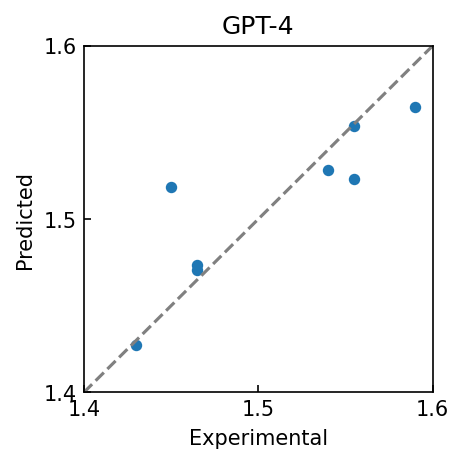

In [8]:

def plot_gpr(gpr_data_dict,key,k,title=""):
    y=gpr_data_dict[key][k][0]
    pred_y=gpr_data_dict[key][k][1]

    plt.figure(figsize=(3,3),dpi=150)
    ax=plt.gca()
    ax.tick_params(direction='in')
    min_y=1.4
    max_y=1.6
    plt.xlim(min_y,max_y)
    plt.ylim(min_y,max_y)

    #yの小数点は1桁
    plt.xticks(np.arange(min_y,max_y,0.1))
    plt.yticks(np.arange(min_y,max_y,0.1))

    plt.xlabel("Experimental")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.plot([min_y,max_y],[min_y,max_y],color="gray",linestyle="dashed")
    plt.scatter(y,pred_y,s=20)
    print(y.sort_index()[:3])

i=3
plot_gpr(gpr_data_dict,('Dataset', 'Random CV', 'All', model),i,"All")
plot_gpr(gpr_data_dict,('Dataset', 'Random CV', 'Random-10', model),i,"Random-10")
plot_gpr(gpr_data_dict,('Dataset', 'Random CV', 'Random-20', model),i,"Random-20")
plot_gpr(gpr_data_dict,('Dataset', 'Random CV', 'Boruta', model),i,"Boruta")
plot_gpr(gpr_data_dict,('Dataset', 'Random CV', 'GPT-4', model),i,"GPT-4")

In [9]:
"""
Boruta selected features:  (9259, 9338, 9279, 9318, 9340, 9341, 9284, 9264, 9298, 9241, 9322, 9251, 9242, 9303, 9342, 9316, 9337, 9256, 9262, 9297, 9324, 9320, 9246, 9244, 9243, 9258, 9332, 9310, 9323, 9311, 9281, 9296, 9295, 9275, 9312) ['DFT_HOMO', 'rdkit_SMR_VSA10', 'rdkit_EState_VSA7', 'rdkit_VSA_EState6', 'rdkit_FractionCSP3', 'JR_GibbsEnergy']
Boruta selected features:  (9259, 9304, 9318, 9340, 9341, 9284, 9264, 9254, 9298, 9241, 9251, 9242, 9303, 9342, 9316, 9301, 9337, 9262, 9297, 9324, 9268, 9286, 9261, 9244, 9258, 9310, 9294, 9311, 9281, 9344, 9296, 9295, 9275, 9334, 9312) ['DFT_HOMO', 'rdkit_BertzCT', 'rdkit_EState_VSA8', 'rdkit_FractionCSP3', 'JR_EnthalpyForm', 'JR_GibbsEnergy']
Boruta selected features:  (9338, 9279, 9304, 9318, 9284, 9264, 9254, 9298, 9241, 9322, 9251, 9242, 9303, 9316, 9301, 9337, 9256, 9262, 9324, 9268, 9320, 9286, 9261, 9246, 9244, 9243, 9332, 9323, 9294, 9311, 9281, 9344, 9295, 9275, 9334) ['DFT_HOMO', 'rdkit_BertzCT', 'rdkit_SMR_VSA10', 'rdkit_SMR_VSA7', 'rdkit_SlogP_VSA6', 'rdkit_VSA_EState6', 'rdkit_FractionCSP3', 'JR_GibbsEnergy']
Boruta selected features:  (9259, 9338, 9279, 9304, 9318, 9340, 9341, 9284, 9264, 9254, 9322, 9251, 9342, 9316, 9301, 9337, 9256, 9262, 9297, 9268, 9320, 9286, 9261, 9246, 9244, 9243, 9258, 9332, 9310, 9323, 9294, 9281, 9344, 9296, 9334, 9312) ['DFT_HOMO', 'rdkit_BertzCT', 'rdkit_SMR_VSA10', 'rdkit_SMR_VSA7', 'rdkit_SlogP_VSA6', 'rdkit_EState_VSA7', 'rdkit_FractionCSP3']
Boruta selected features:  (9259, 9338, 9279, 9304, 9340, 9341, 9254, 9298, 9241, 9322, 9242, 9303, 9342, 9301, 9256, 9297, 9324, 9268, 9320, 9286, 9261, 9246, 9243, 9258, 9332, 9310, 9323, 9294, 9311, 9344, 9296, 9295, 9275, 9334, 9312) ['DFT_HOMO', 'rdkit_BertzCT', 'rdkit_SMR_VSA7', 'rdkit_SlogP_VSA6', 'rdkit_VSA_EState6', 'rdkit_FractionCSP3', 'JR_GibbsEnergy']
"""

"\nBoruta selected features:  (9259, 9338, 9279, 9318, 9340, 9341, 9284, 9264, 9298, 9241, 9322, 9251, 9242, 9303, 9342, 9316, 9337, 9256, 9262, 9297, 9324, 9320, 9246, 9244, 9243, 9258, 9332, 9310, 9323, 9311, 9281, 9296, 9295, 9275, 9312) ['DFT_HOMO', 'rdkit_SMR_VSA10', 'rdkit_EState_VSA7', 'rdkit_VSA_EState6', 'rdkit_FractionCSP3', 'JR_GibbsEnergy']\nBoruta selected features:  (9259, 9304, 9318, 9340, 9341, 9284, 9264, 9254, 9298, 9241, 9251, 9242, 9303, 9342, 9316, 9301, 9337, 9262, 9297, 9324, 9268, 9286, 9261, 9244, 9258, 9310, 9294, 9311, 9281, 9344, 9296, 9295, 9275, 9334, 9312) ['DFT_HOMO', 'rdkit_BertzCT', 'rdkit_EState_VSA8', 'rdkit_FractionCSP3', 'JR_EnthalpyForm', 'JR_GibbsEnergy']\nBoruta selected features:  (9338, 9279, 9304, 9318, 9284, 9264, 9254, 9298, 9241, 9322, 9251, 9242, 9303, 9316, 9301, 9337, 9256, 9262, 9324, 9268, 9320, 9286, 9261, 9246, 9244, 9243, 9332, 9323, 9294, 9311, 9281, 9344, 9295, 9275, 9334) ['DFT_HOMO', 'rdkit_BertzCT', 'rdkit_SMR_VSA10', 'rdkit_S

In [10]:
all_descriptors=[
 'DFT_energy',
 'DFT_dipoleX',
 'DFT_dipoleY',
 'DFT_dipoleZ',
 'DFT_dipoleTot',
 'DFT_HOMO',
 'DFT_LUMO',
 'DFT_alpha656nm',
 'rdkit_vol',
 'rdkit_MaxEStateIndex',
 'rdkit_MinEStateIndex',
 'rdkit_MaxAbsEStateIndex',
 'rdkit_MinAbsEStateIndex',
 'rdkit_qed',
 'rdkit_MolWt',
 'rdkit_HeavyAtomMolWt',
 'rdkit_ExactMolWt',
 'rdkit_NumValenceElectrons',
 'rdkit_NumRadicalElectrons',
 'rdkit_MaxPartialCharge',
 'rdkit_MinPartialCharge',
 'rdkit_MaxAbsPartialCharge',
 'rdkit_MinAbsPartialCharge',
 'rdkit_FpDensityMorgan1',
 'rdkit_FpDensityMorgan2',
 'rdkit_FpDensityMorgan3',
 'rdkit_BCUT2D_MWHI',
 'rdkit_BCUT2D_MWLOW',
 'rdkit_BCUT2D_CHGHI',
 'rdkit_BCUT2D_CHGLO',
 'rdkit_BCUT2D_LOGPHI',
 'rdkit_BCUT2D_LOGPLOW',
 'rdkit_BCUT2D_MRHI',
 'rdkit_BCUT2D_MRLOW',
 'rdkit_BalabanJ',
 'rdkit_BertzCT',
 'rdkit_Chi0',
 'rdkit_Chi0n',
 'rdkit_Chi0v',
 'rdkit_Chi1',
 'rdkit_Chi1n',
 'rdkit_Chi1v',
 'rdkit_Chi2n',
 'rdkit_Chi2v',
 'rdkit_Chi3n',
 'rdkit_Chi3v',
 'rdkit_Chi4n',
 'rdkit_Chi4v',
 'rdkit_HallKierAlpha',
 'rdkit_Ipc',
 'rdkit_Kappa1',
 'rdkit_Kappa2',
 'rdkit_Kappa3',
 'rdkit_LabuteASA',
 'rdkit_PEOE_VSA1',
 'rdkit_PEOE_VSA10',
 'rdkit_PEOE_VSA11',
 'rdkit_PEOE_VSA12',
 'rdkit_PEOE_VSA13',
 'rdkit_PEOE_VSA14',
 'rdkit_PEOE_VSA2',
 'rdkit_PEOE_VSA3',
 'rdkit_PEOE_VSA4',
 'rdkit_PEOE_VSA5',
 'rdkit_PEOE_VSA6',
 'rdkit_PEOE_VSA7',
 'rdkit_PEOE_VSA8',
 'rdkit_PEOE_VSA9',
 'rdkit_SMR_VSA1',
 'rdkit_SMR_VSA10',
 'rdkit_SMR_VSA2',
 'rdkit_SMR_VSA3',
 'rdkit_SMR_VSA4',
 'rdkit_SMR_VSA5',
 'rdkit_SMR_VSA6',
 'rdkit_SMR_VSA7',
 'rdkit_SMR_VSA8',
 'rdkit_SMR_VSA9',
 'rdkit_SlogP_VSA1',
 'rdkit_SlogP_VSA10',
 'rdkit_SlogP_VSA11',
 'rdkit_SlogP_VSA12',
 'rdkit_SlogP_VSA2',
 'rdkit_SlogP_VSA3',
 'rdkit_SlogP_VSA4',
 'rdkit_SlogP_VSA5',
 'rdkit_SlogP_VSA6',
 'rdkit_SlogP_VSA7',
 'rdkit_SlogP_VSA8',
 'rdkit_SlogP_VSA9',
 'rdkit_TPSA',
 'rdkit_EState_VSA1',
 'rdkit_EState_VSA10',
 'rdkit_EState_VSA11',
 'rdkit_EState_VSA2',
 'rdkit_EState_VSA3',
 'rdkit_EState_VSA4',
 'rdkit_EState_VSA5',
 'rdkit_EState_VSA6',
 'rdkit_EState_VSA7',
 'rdkit_EState_VSA8',
 'rdkit_EState_VSA9',
 'rdkit_VSA_EState1',
 'rdkit_VSA_EState10',
 'rdkit_VSA_EState2',
 'rdkit_VSA_EState3',
 'rdkit_VSA_EState4',
 'rdkit_VSA_EState5',
 'rdkit_VSA_EState6',
 'rdkit_VSA_EState7',
 'rdkit_VSA_EState8',
 'rdkit_VSA_EState9',
 'rdkit_FractionCSP3',
 'rdkit_HeavyAtomCount',
 'rdkit_NHOHCount',
 'rdkit_NOCount',
 'rdkit_NumAliphaticCarbocycles',
 'rdkit_NumAliphaticHeterocycles',
 'rdkit_NumAliphaticRings',
 'rdkit_NumAromaticCarbocycles',
 'rdkit_NumAromaticHeterocycles',
 'rdkit_NumAromaticRings',
 'rdkit_NumHAcceptors',
 'rdkit_NumHDonors',
 'rdkit_NumHeteroatoms',
 'rdkit_NumRotatableBonds',
 'rdkit_NumSaturatedCarbocycles',
 'rdkit_NumSaturatedHeterocycles',
 'rdkit_NumSaturatedRings',
 'rdkit_RingCount',
 'rdkit_MolLogP',
 'rdkit_MolMR',
 'rdkit_fr_Al_COO',
 'rdkit_fr_Al_OH',
 'rdkit_fr_Al_OH_noTert',
 'rdkit_fr_ArN',
 'rdkit_fr_Ar_COO',
 'rdkit_fr_Ar_N',
 'rdkit_fr_Ar_NH',
 'rdkit_fr_Ar_OH',
 'rdkit_fr_COO',
 'rdkit_fr_COO2',
 'rdkit_fr_C_O',
 'rdkit_fr_C_O_noCOO',
 'rdkit_fr_C_S',
 'rdkit_fr_HOCCN',
 'rdkit_fr_Imine',
 'rdkit_fr_NH0',
 'rdkit_fr_NH1',
 'rdkit_fr_NH2',
 'rdkit_fr_N_O',
 'rdkit_fr_Ndealkylation1',
 'rdkit_fr_Ndealkylation2',
 'rdkit_fr_Nhpyrrole',
 'rdkit_fr_SH',
 'rdkit_fr_aldehyde',
 'rdkit_fr_alkyl_carbamate',
 'rdkit_fr_alkyl_halide',
 'rdkit_fr_allylic_oxid',
 'rdkit_fr_amide',
 'rdkit_fr_amidine',
 'rdkit_fr_aniline',
 'rdkit_fr_aryl_methyl',
 'rdkit_fr_azide',
 'rdkit_fr_azo',
 'rdkit_fr_barbitur',
 'rdkit_fr_benzene',
 'rdkit_fr_benzodiazepine',
 'rdkit_fr_bicyclic',
 'rdkit_fr_diazo',
 'rdkit_fr_dihydropyridine',
 'rdkit_fr_epoxide',
 'rdkit_fr_ester',
 'rdkit_fr_ether',
 'rdkit_fr_furan',
 'rdkit_fr_guanido',
 'rdkit_fr_halogen',
 'rdkit_fr_hdrzine',
 'rdkit_fr_hdrzone',
 'rdkit_fr_imidazole',
 'rdkit_fr_imide',
 'rdkit_fr_isocyan',
 'rdkit_fr_isothiocyan',
 'rdkit_fr_ketone',
 'rdkit_fr_ketone_Topliss',
 'rdkit_fr_lactam',
 'rdkit_fr_lactone',
 'rdkit_fr_methoxy',
 'rdkit_fr_morpholine',
 'rdkit_fr_nitrile',
 'rdkit_fr_nitro',
 'rdkit_fr_nitro_arom',
 'rdkit_fr_nitro_arom_nonortho',
 'rdkit_fr_nitroso',
 'rdkit_fr_oxazole',
 'rdkit_fr_oxime',
 'rdkit_fr_para_hydroxylation',
 'rdkit_fr_phenol',
 'rdkit_fr_phenol_noOrthoHbond',
 'rdkit_fr_phos_acid',
 'rdkit_fr_phos_ester',
 'rdkit_fr_piperdine',
 'rdkit_fr_piperzine',
 'rdkit_fr_priamide',
 'rdkit_fr_prisulfonamd',
 'rdkit_fr_pyridine',
 'rdkit_fr_quatN',
 'rdkit_fr_sulfide',
 'rdkit_fr_sulfonamd',
 'rdkit_fr_sulfone',
 'rdkit_fr_term_acetylene',
 'rdkit_fr_tetrazole',
 'rdkit_fr_thiazole',
 'rdkit_fr_thiocyan',
 'rdkit_fr_thiophene',
 'rdkit_fr_unbrch_alkane',
 'rdkit_fr_urea',
 'JR_BoilingPoint',
 'JR_MeltingPoint',
 'JR_CriticalTemp',
 'JR_CriticalPress',
 'JR_CriticalVolume',
 'JR_EnthalpyForm',
 'JR_GibbsEnergy',
 'JR_HeatCapacity',
 'JR_EnthalpyVap',
 'JR_EnthalpyFus',
 'JR_LiquidVisco',
 'JR_CrystalSolub_1',
 'JR_CrystalSolub_2',
 'JR_AmorphSolub_1',
 'JR_AmorphSolub_2',
 'DFTMD_vol',
 'Experimental_volume',
 'Experimental_alpha']

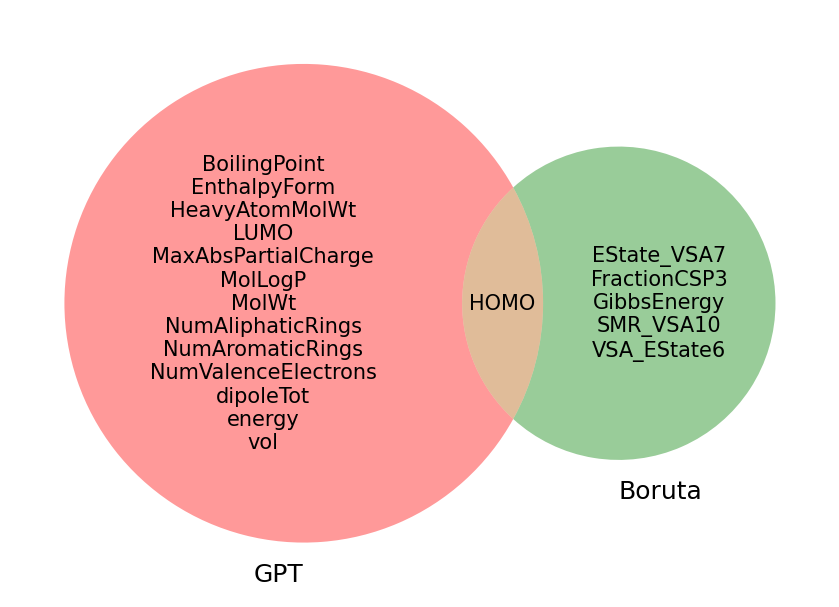

In [11]:
from matplotlib_venn import venn2,venn3
import matplotlib.pyplot as plt

boruta_list=['DFT_HOMO', 'rdkit_SMR_VSA10', 'rdkit_EState_VSA7', 'rdkit_VSA_EState6', 'rdkit_FractionCSP3', 'JR_GibbsEnergy']
gpt4_list=["DFT_energy", "DFT_HOMO", "DFT_LUMO", "DFT_dipoleTot", "rdkit_MolWt", "rdkit_NumValenceElectrons", "rdkit_NumAromaticRings", "rdkit_NumAliphaticRings", "DFTMD_vol", "rdkit_HeavyAtomMolWt", "rdkit_MaxAbsPartialCharge", "rdkit_MolLogP", "JR_BoilingPoint", "JR_EnthalpyForm"]
gpt4_lasso_list=['DFT_energy',
 'DFT_HOMO',
 'DFT_LUMO',
 'DFT_dipoleTot',
 'rdkit_MolWt',
 'rdkit_NumValenceElectrons',
 'rdkit_NumAromaticRings',
 'rdkit_NumAliphaticRings',
 'DFTMD_vol',
 'rdkit_HeavyAtomMolWt',
 'rdkit_MolLogP',
 'JR_BoilingPoint',
 'JR_EnthalpyForm']

def repl_text(t):
    t=t.replace("DFT_","")
    t=t.replace("rdkit_","")
    t=t.replace("JR_","")
    t=t.replace("DFTMD_","")
    return t

boruta_list=[repl_text(i) for i in boruta_list]
gpt4_list=[repl_text(i) for i in gpt4_list]
gpt4_lasso_list=[repl_text(i) for i in gpt4_lasso_list]
all_descriptors=[repl_text(i) for i in all_descriptors]


plt.figure(figsize=(10,5),dpi=150)

set1=set(gpt4_list)
set2=set(boruta_list)
v=venn2([set1,set2], set_labels = ('GPT',"Boruta"))
v.get_label_by_id('10').set_text('\n'.join(sorted(set1-set2)))  # Set1のみに存在する要素
v.get_label_by_id('01').set_text('\n'.join(sorted(set2-set1)))  # Set2のみに存在する要素
v.get_label_by_id('11').set_text('\n'.join(sorted(set1&set2)))  # 両方のセットに存在する要素


In [12]:
sorted(set1-set2)

['BoilingPoint',
 'EnthalpyForm',
 'HeavyAtomMolWt',
 'LUMO',
 'MaxAbsPartialCharge',
 'MolLogP',
 'MolWt',
 'NumAliphaticRings',
 'NumAromaticRings',
 'NumValenceElectrons',
 'dipoleTot',
 'energy',
 'vol']

In [13]:
sorted(set2)

['EState_VSA7',
 'FractionCSP3',
 'GibbsEnergy',
 'HOMO',
 'SMR_VSA10',
 'VSA_EState6']

235

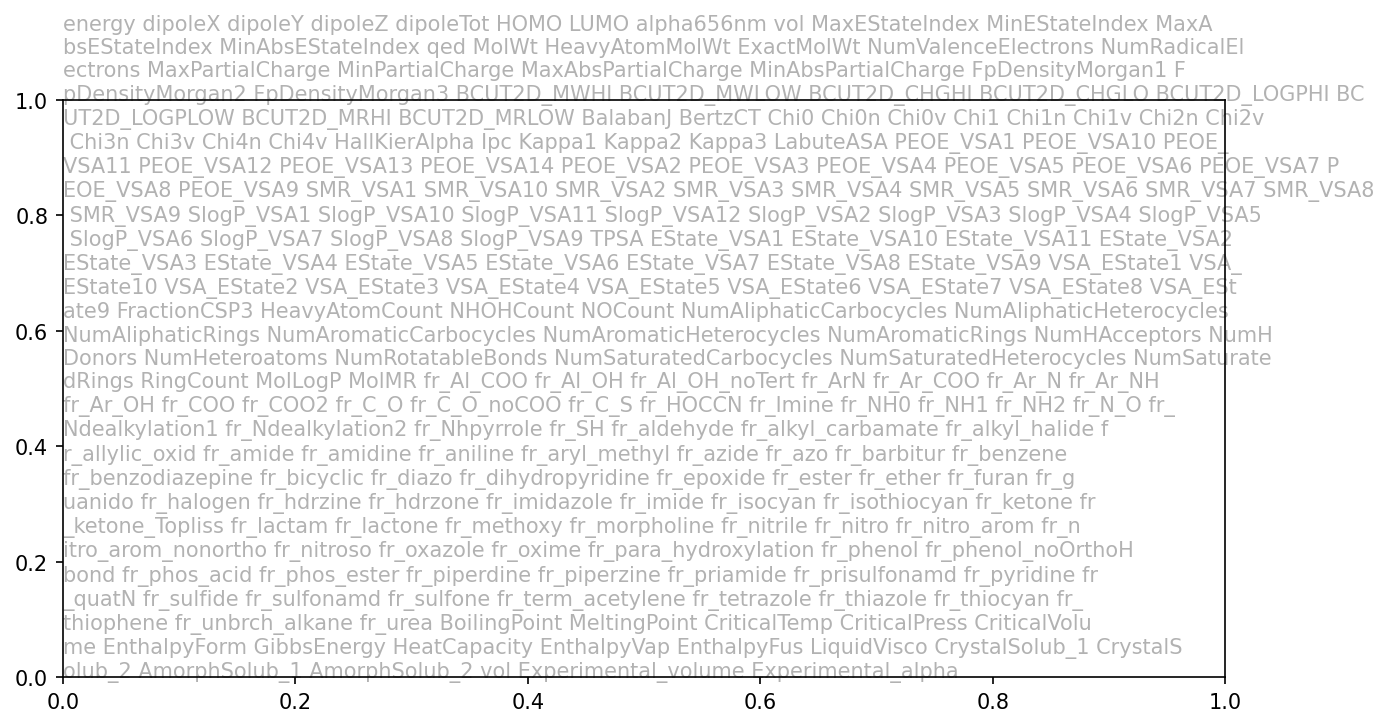

In [14]:

plt.figure(figsize=(10,5),dpi=150)

text=" ".join(all_descriptors)
new_text = '\n'.join(text[i:i+100] for i in range(0, len(text), 100))
plt.text(-0,0,new_text,fontsize=10,alpha=0.3)

len(all_descriptors)

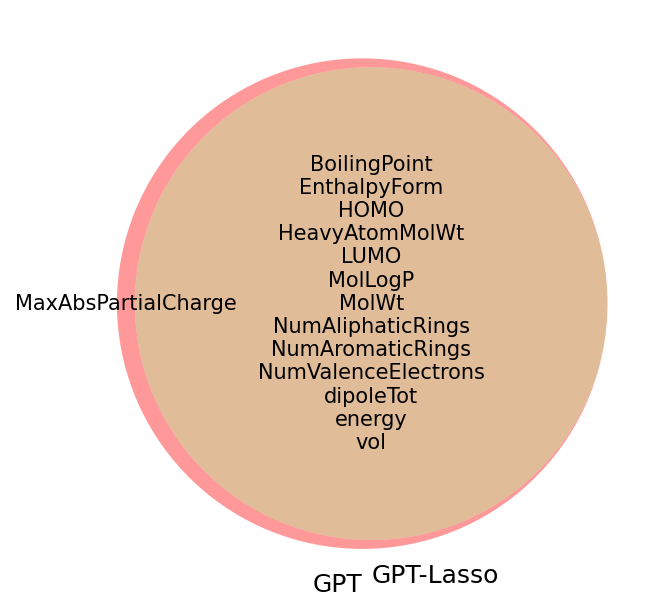

In [15]:

plt.figure(figsize=(10,5),dpi=150)
set1=set(gpt4_list)
set2=set(gpt4_lasso_list)
v=venn2([set1,set2], set_labels = ('GPT',"GPT-Lasso"))
v.get_label_by_id('10').set_text('\n'.join(sorted(set1-set2)))  # Set1のみに存在する要素
v.get_label_by_id('01').set_text('\n'.join(sorted(set2-set1)))  # Set2のみに存在する要素
v.get_label_by_id('11').set_text('\n'.join(sorted(set1&set2)))  # 両方のセットに存在する要素


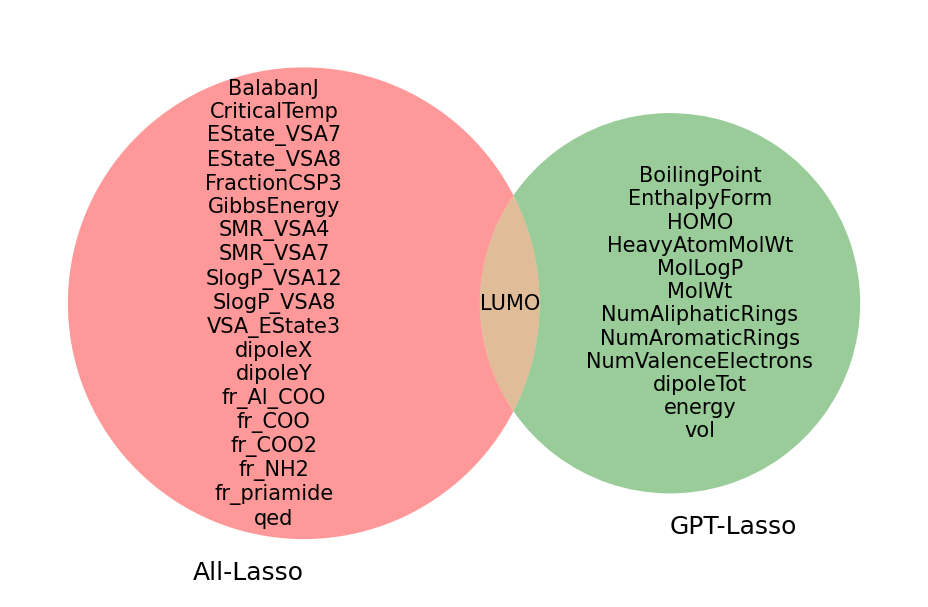

In [17]:
all_lasso_set=['DFT_dipoleX',
 'DFT_dipoleY',
 'DFT_LUMO',
 'rdkit_qed',
 'rdkit_BalabanJ',
 'rdkit_SMR_VSA4',
 'rdkit_SMR_VSA7',
 'rdkit_SlogP_VSA12',
 'rdkit_SlogP_VSA8',
 'rdkit_EState_VSA7',
 'rdkit_EState_VSA8',
 'rdkit_VSA_EState3',
 'rdkit_FractionCSP3',
 'rdkit_fr_Al_COO',
 'rdkit_fr_COO',
 'rdkit_fr_COO2',
 'rdkit_fr_NH2',
 'rdkit_fr_priamide',
 'JR_CriticalTemp',
 'JR_GibbsEnergy']

all_lasso_set=[repl_text(i) for i in all_lasso_set]
plt.figure(figsize=(10,5),dpi=150)
set1=set(all_lasso_set)
set2=set(gpt4_lasso_list)
v=venn2([set1,set2], set_labels = ('All-Lasso',"GPT-Lasso"))
v.get_label_by_id('10').set_text('\n'.join(sorted(set1-set2)))  # Set1のみに存在する要素
v.get_label_by_id('01').set_text('\n'.join(sorted(set2-set1)))  # Set2のみに存在する要素
v.get_label_by_id('11').set_text('\n'.join(sorted(set1&set2)))  # 両方のセットに存在する要素

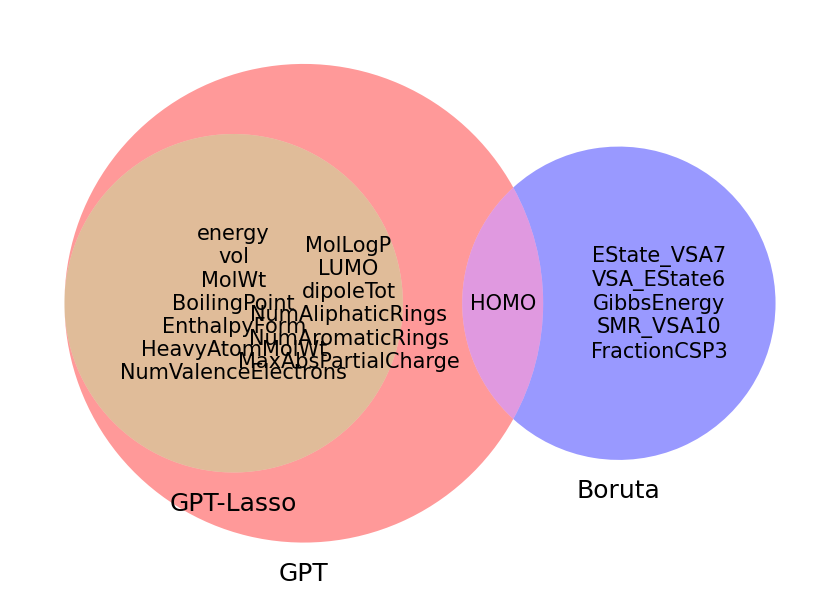

In [16]:
plt.figure(figsize=(10,5),dpi=150)
set1=set(gpt4_list)
set2=set(gpt4_lasso_list)
set3=set(boruta_list)
v=venn3([set1,set2,set3], set_labels = ('GPT',"GPT-Lasso","Boruta"))
#v.get_label_by_id('110').set_text('\n'.join(sorted(set1&set2))) 


v.get_label_by_id('100').set_text('\n'.join(set1 - set2 - set3))
#v.get_label_by_id('010').set_text('\n'.join(set2 - set1 - set3))
v.get_label_by_id('001').set_text('\n'.join(set3 - set1 - set2))
v.get_label_by_id('110').set_text('\n'.join(set1 & set2 - set3))
v.get_label_by_id('101').set_text('\n'.join(set1 & set3 - set2))
#v.get_label_by_id('011').set_text('\n'.join(set2 & set3 - set1))
#v.get_label_by_id('111').set_text('\n'.join(set1 & set2 & set3))


In [17]:
path="database/20230501with_dens/forpub2.csv"
original_df=pd.read_csv(path,index_col=0)
smiles_list=original_df["SMILES"].tolist()

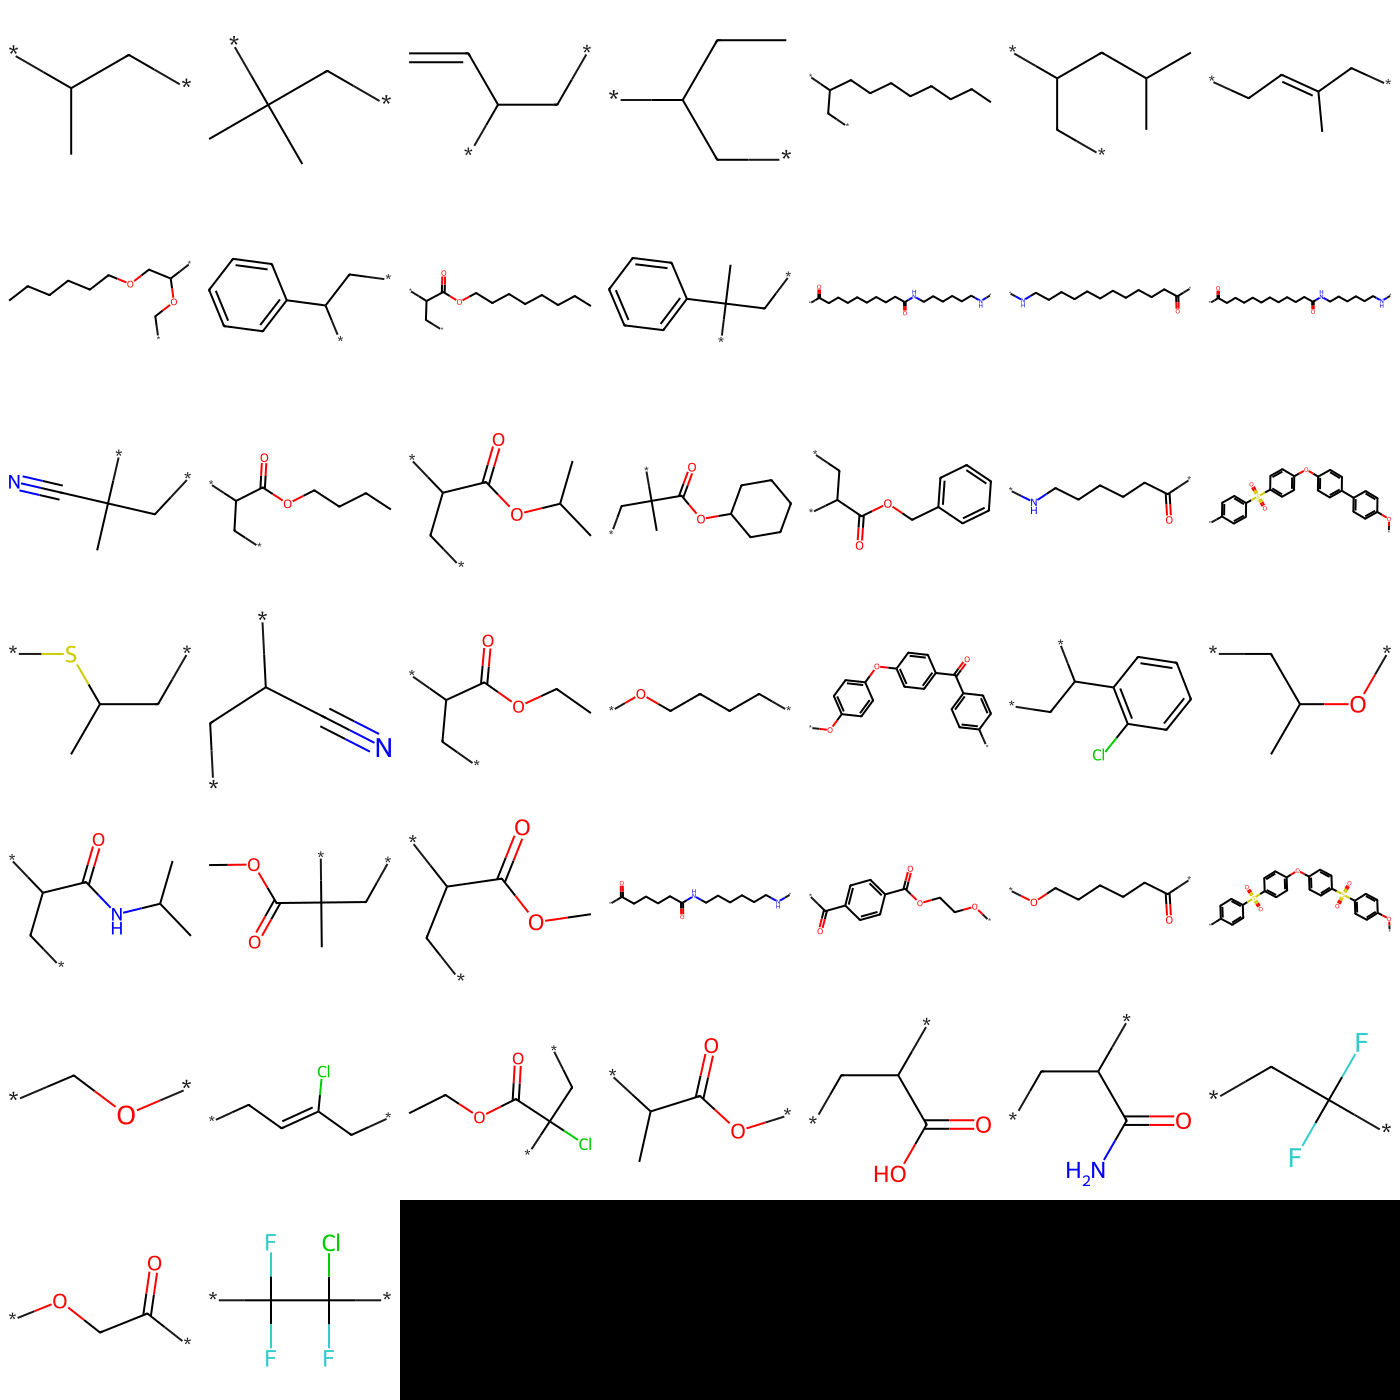

In [18]:
from rdkit import Chem
from rdkit.Chem import Draw

mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
#Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300, 300))

from PIL import Image
import math

mol_images = [Draw.MolToImage(mol, size=(200, 200)) for mol in mols]

grid_size = math.isqrt(len(mols)) 
grid_size=7
img_grid = Image.new('RGB', (grid_size*200, grid_size*200))  

for i, img in enumerate(mol_images):
    row = i // grid_size
    col = i % grid_size
    img_grid.paste(img, (col*200, row*200))  

img_grid

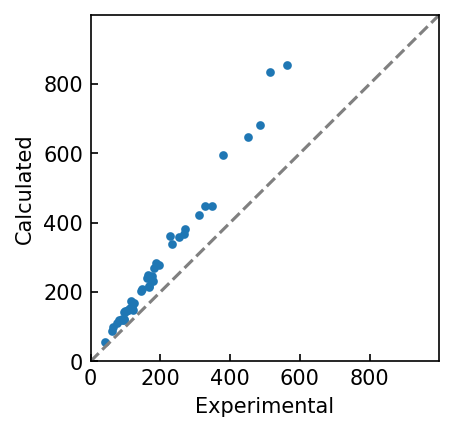

In [21]:
plt.figure(figsize=(3,3),dpi=150)
ax=plt.gca()
ax.tick_params(direction='in')
min_y=0
max_y=1000
plt.xlim(min_y,max_y)
plt.ylim(min_y,max_y)

plt.xticks(np.arange(min_y,max_y,200))
plt.yticks(np.arange(min_y,max_y,200))

plt.xlabel("Experimental")
plt.ylabel("Calculated")
plt.plot([min_y,max_y],[min_y,max_y],color="gray",linestyle="dashed")
plt.scatter(original_df["Experimental_volume"],original_df["DFTMD_vol"],s=10)

In [22]:
original_df["Experimental_volume"].corr(original_df["DFTMD_vol"])

0.9933705753536405